<a href="https://colab.research.google.com/github/ssprasad-cyber/Co2Emission_prediction-Multi-Linear-Regression/blob/main/Co2Emission_prediction_Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [2]:
dt = pd.read_csv('/content/drive/MyDrive/ml projects/datasets/FuelConsumption.csv')
dt.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
dt.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


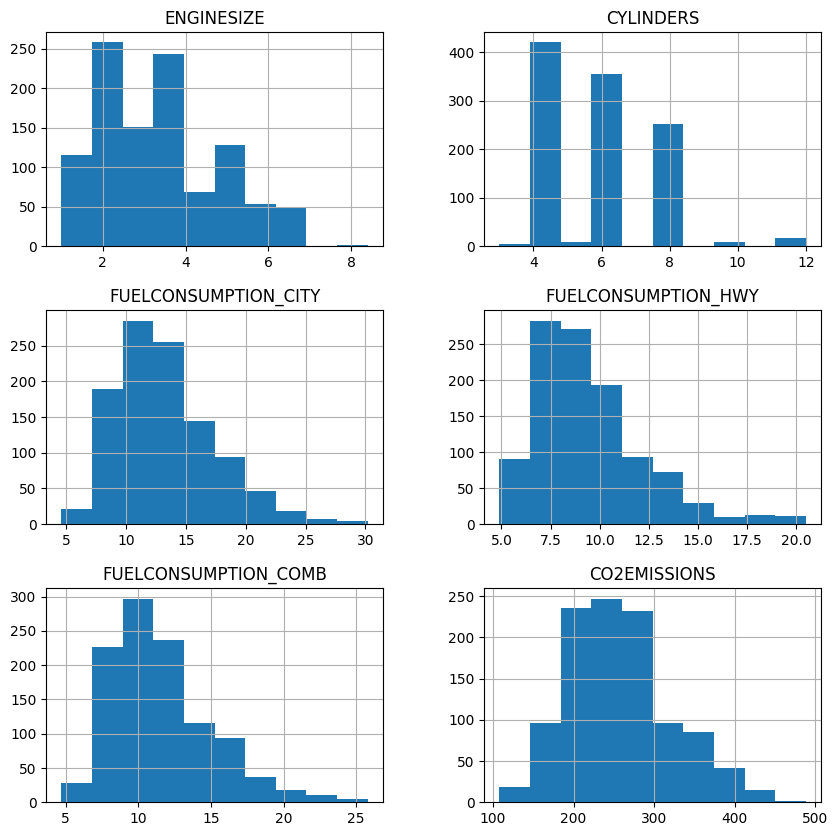

In [12]:
df = dt[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.hist(figsize=(10,10))
plt.show()

In [34]:
input = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']
output = ['CO2EMISSIONS']

In [14]:
tts = np.random.rand(len(dt)) < 0.8

train = df[tts]
test = df[~tts]

In [28]:
print("train set %s \ntest set %s" %(train.shape,test.shape))

train set (877, 6) 
test set (190, 6)


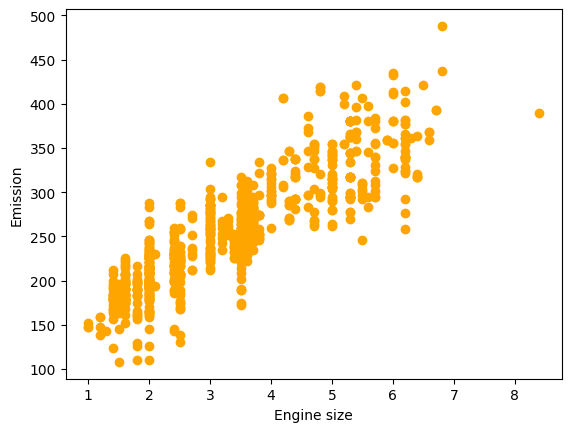

In [33]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='orange')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [40]:
reg_m = linear_model.LinearRegression()
x = np.asanyarray(train[input])
y = np.asanyarray(train[output])
reg_m.fit(x,y)
print("Coefficients: ",reg_m.coef_)

Coefficients:  [[11.28249936  6.92846808 -9.84969546 -9.58725173 28.82960489]]


In [56]:
out_ = reg_m.predict(test[input])
x = np.asanyarray(test[input])
y = np.asanyarray(test[output])
print("MEA SQUARE ERROR :" ,np.mean((out_ - y) ** 2))
print("variance score: ", reg_m.score(x, y))

MEA SQUARE ERROR : 545.8154852948763
variance score:  0.8668150589757165


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## MODEL

In [63]:
# output co2emmision - 196(Expected)
x_input = np.asanyarray([[2.0,4,9.9,6.7,8.5]])
out_ = reg_m.predict(x_input)
print("Co2Emission :",format(float(out_),'.2f'))

Co2Emission : 199.96


<ipython-input-63-cba283b2daf3>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Co2Emission :",format(float(out_),'.2f'))
